## Load Libraries

In [28]:
import os
import matplotlib
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image

%matplotlib inline

## Load Dataset

In [2]:
csv_name = "fashion_image_small.csv"

In [3]:
df = pd.read_csv(csv_name)

## Show Dataframe Dimension

In [4]:
df.shape

(35480, 2)

## Show Dataframe Values

In [5]:
df.head(10)

,id,articleType
0,1163,Tshirts
1,1164,Tshirts
2,1165,Tshirts
3,1525,Backpacks
4,1526,Backpacks
5,1529,Tshirts
6,1531,Tshirts
7,1532,Tshirts
8,1533,Tshirts
9,1534,Tshirts


## Show Dataframe Type

In [6]:
df.dtypes

id              int64
articleType    object
dtype: object

## Arrage ID in ascending order

In [7]:
df = df.sort_values(by=['id']).reset_index(drop = True)

## Value Counts

In [6]:
df.articleType.value_counts()

Tshirts         7069
Shirts          3215
Casual Shoes    2846
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Wallets          936
Flip Flops       916
Sandals          897
Briefs           849
Belts            813
Backpacks        724
Socks            686
Formal Shoes     637
Jeans            608
Shorts           547
Trousers         530
Flats            500
Bra              477
Dresses          464
Sarees           427
Name: articleType, dtype: int64

## Show Image

In [7]:
def show_image(img):
    plt.imshow (img, cmap = matplotlib.cm.gray, interpolation = 'nearest')

## Get Image Path

In [8]:
image_path = "fashion_image_small\\"

In [9]:
test_img_path = image_path + "60000.jpg"

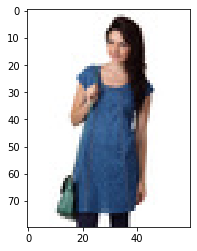

In [10]:
img = Image.open(test_img_path)
show_image(img)

In [12]:
# image_path_arr = [f"img/images/{i}.jpg" for i in df.id]

## Remove 3000 TShirt Records from dataset

In [24]:
ind = 0
arr = []
for index, row in df.iterrows():
    prob = np.random.uniform(0, 1)
    if row["articleType"] == "Tshirts" and prob < 0.4:
        arr.append(row["id"])

In [40]:
len(arr)

2884

In [44]:
df = df[~df.id.isin(arr)]
df

,id,articleType
0,1163,Tshirts
1,1164,Tshirts
2,1165,Tshirts
3,1525,Backpacks
4,1526,Backpacks
...,...,...
35475,59995,Dresses
35476,59996,Dresses
35477,59998,Heels
35478,59999,Heels


## Sort Dataframe by articleType

In [68]:
df = df.sort_values(by = ["articleType", "id"]).reset_index(drop = True)

In [69]:
df

,id,articleType
0,1525,Backpacks
1,1526,Backpacks
2,1556,Backpacks
3,1557,Backpacks
4,1559,Backpacks
...,...,...
32591,59287,Watches
32592,59290,Watches
32593,59291,Watches
32594,59292,Watches


## Create New Folder

In [29]:
path = "kaggle_fashion_small"

In [34]:
for i in sorted(df.articleType.unique()):
    new_path = os.path.join(path, i)
    os.mkdir(new_path)

## Move Images to New Folder

In [13]:
# new_folder = "tmp_folder"

In [14]:
# for src in image_path_arr:
#     shutil.move(src, new_folder)

## Match Image Name in Folder and Dataset

In [35]:
tmp_arr = glob("fashion_image_small/*")

In [46]:
tmp_tmp_arr = sorted([int(i.split("\\")[1][:-4]) for i in tmp_arr])

In [51]:
new_arr = df.id.tolist()

In [53]:
new_arr = list(map(int, new_arr))

In [54]:
tmp_tmp_tmp_arr = [i for i in tmp_tmp_arr if i in new_arr]

In [55]:
len(tmp_tmp_tmp_arr)

32596

In [72]:
src_path = "fashion_image_small"
dest_path = "kaggle_fashion_small"
for index, row in df.iterrows():
    id = row["id"]
    articleType = row["articleType"]
    src = os.path.join(src_path, f"{id}.jpg")
    dest = os.path.join(dest_path, articleType, f"{id}.jpg")
    shutil.move(src, dest)
    

In [73]:
df.to_csv("fashion_image_small.csv", index=False)